In [1]:
import inverse_geometry
import inverse_geometry_test
import old_inverse_geometry
from function_profiler import FunctionProfiler
from tools import setupwithmeshcat

pybullet build time: Oct 14 2023 16:04:51


In [2]:
robot, cube, viz = setupwithmeshcat()

Wrapper tries to connect to server <tcp://127.0.0.1:6000>
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


# Inverse geometry performance evaluation

In [ ]:
profiler = FunctionProfiler()

In [ ]:
@profiler.profile("Solution A")
def computeqgrasppose_a(robot, qcurrent, cube, cubetarget, viz=None):
    return inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

@profiler.profile("Solution B")
def computeqgrasppose_b(robot, qcurrent, cube, cubetarget, viz=None):
    return old_inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

In [ ]:
# inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=100, computeqgrasppose=computeqgrasppose_a)
inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=2, computeqgrasppose=computeqgrasppose_b)

In [ ]:
profiler.plot("Solution A")

In [ ]:
profiler.plot("Solution B")

# Motion planning performance evaluation

In [4]:
from path_plots import plot_path_2d

In [9]:
plot_path_2d(robot, cube, viz, max_neighbors=4, neighborhood_radius=0.6, plot_title="RRT* Path Visualization", iters=10, shortcut_iterations=20)

Pass 1 of 10
🦾 Starting RTT*


Pass 1 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 2 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 3 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 4 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 5 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 6 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 7 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Do

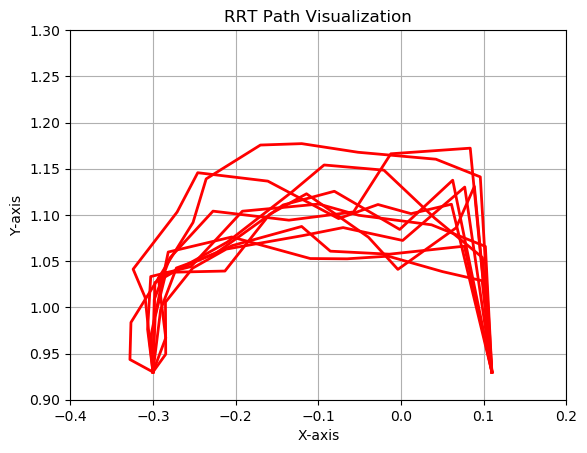

In [8]:
plot_path_2d(robot, cube, viz, neighborhood_radius=0.2, max_neighbors=1, color='red', iters=10, shortcut_iterations=20, plot_title="RRT Path Visualization")